In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


In [5]:
def load_data():
    train_dataset = h5py.File("datasets/train_catvnoncat.h5", "r")
    test_dataset = h5py.File("datasets/test_catvnoncat.h5", "r")
    
    train_x = np.array(train_dataset["train_set_x"][:])
    train_y = np.array(train_dataset["train_set_y"][:]).reshape(1, -1)
    
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:]).reshape(1, -1)
    
    return train_x, train_y, test_x, test_y

train_x_orig, train_y, test_x_orig, test_y = load_data()


In [6]:
# flatten
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# normalize
train_x = train_x / 255.0
test_x = test_x / 255.0

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)


(12288, 209) (1, 209)
(12288, 50) (1, 50)


In [7]:
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


In [8]:
def initialize_parameters(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b"+str(l)] = np.zeros((layer_dims[l], 1))
    return parameters


In [9]:
def forward_propagation(X, parameters):
    caches = {}
    A = X
    L = len(parameters)//2
    
    for l in range(1, L):
        Z = np.dot(parameters["W"+str(l)], A) + parameters["b"+str(l)]
        A = relu(Z)
        caches["A"+str(l)] = A
        caches["Z"+str(l)] = Z
    
    ZL = np.dot(parameters["W"+str(L)], A) + parameters["b"+str(L)]
    AL = sigmoid(ZL)
    caches["AL"] = AL
    return AL, caches


In [10]:
def compute_loss(AL, Y):
    m = Y.shape[1]
    return -1/m * np.sum(Y*np.log(AL+1e-8) + (1-Y)*np.log(1-AL+1e-8))


In [11]:
def backward_propagation(X, Y, parameters, caches):
    grads = {}
    m = X.shape[1]
    L = len(parameters)//2
    
    dZ = caches["AL"] - Y
    grads["dW"+str(L)] = 1/m * np.dot(dZ, caches["A"+str(L-1)].T)
    grads["db"+str(L)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    
    dA = np.dot(parameters["W"+str(L)].T, dZ)
    
    for l in reversed(range(1, L)):
        dZ = dA * (caches["Z"+str(l)] > 0)
        A_prev = X if l == 1 else caches["A"+str(l-1)]
        grads["dW"+str(l)] = 1/m * np.dot(dZ, A_prev.T)
        grads["db"+str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if l > 1:
            dA = np.dot(parameters["W"+str(l)].T, dZ)
    
    return grads


In [12]:
def update_parameters(parameters, grads, lr):
    for l in range(1, len(parameters)//2 + 1):
        parameters["W"+str(l)] -= lr * grads["dW"+str(l)]
        parameters["b"+str(l)] -= lr * grads["db"+str(l)]
    return parameters


In [13]:
def train_model(X, Y, layers, epochs, lr):
    parameters = initialize_parameters(layers)
    losses = []
    
    for i in range(epochs):
        AL, caches = forward_propagation(X, parameters)
        loss = compute_loss(AL, Y)
        grads = backward_propagation(X, Y, parameters, caches)
        parameters = update_parameters(parameters, grads, lr)
        losses.append(loss)
    
    return parameters, losses


In [14]:
layers = [train_x.shape[0], 64, 32, 1]
parameters, losses = train_model(train_x, train_y, layers, epochs=1500, lr=0.01)


In [15]:
def accuracy(X, Y, parameters):
    AL, _ = forward_propagation(X, parameters)
    preds = (AL > 0.5).astype(int)
    return 100 - np.mean(np.abs(preds - Y)) * 100

print("Training Accuracy:", accuracy(train_x, train_y, parameters), "%")
print("Testing Accuracy:", accuracy(test_x, test_y, parameters), "%")


Training Accuracy: 65.55023923444976 %
Testing Accuracy: 34.0 %


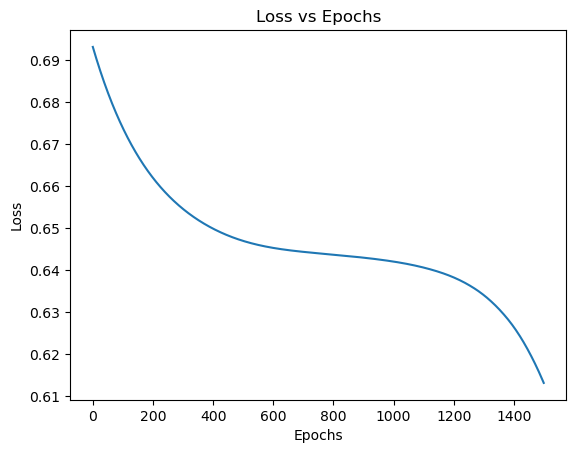

In [17]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()
